# Importing Libraries for Data Processing, Model Building

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, classification_report

# load dataset

In [2]:
df = pd. read_csv(r"new_dataset.csv")
df.head(5)

C:\Users\p c\AppData\Local\Temp\ipykernel_2492\1776127973.py:1: DtypeWarning: Columns (7,10,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd. read_csv(r"new_dataset.csv")


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,...,slope,ca,thal,smoker,alcohol_use,physical_activity_level,num,height,weight,bmi
0,1.0,59.0,Male,Hungarian,typical angina,176.0,232.0,False,normal,150.0,...,upsloping,0.0,normal,False,Moderate,Moderate,0,1.490339,92.419624,41.600000
1,2.0,53.0,Male,Long Beach V,typical angina,143.0,227.0,False,normal,144.0,...,upsloping,1.0,normal,True,Moderate,Moderate,0,1.625852,65.535288,24.800000
2,3.0,61.0,Male,Long Beach V,atypical angina,128.0,253.0,False,normal,105.0,...,upsloping,3.0,fixed defect,False,Moderate,High,0,1.429611,46.314369,22.700000
3,4.0,70.0,Male,Hungarian,atypical angina,180.0,216.0,True,normal,129.0,...,flat,0.0,reversable defect,False,No,High,2,1.704388,57.464082,20.951282
4,5.0,52.0,Female,Cleveland,atypical angina,135.0,323.0,False,normal,124.0,...,flat,2.0,reversable defect,False,Moderate,Low,1,1.787194,77.901689,25.063356


In [3]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num,height,weight,bmi
count,167194.000000,167104.000000,166807.000000,167182.000000,167154.000000,167011.000000,167105.000000,167305.000000,167131.000000,166926.000000,167156.000000
mean,83649.442019,54.519964,139.438327,260.424830,142.084305,2.022327,0.649268,1.046412,1.650319,70.090782,27.220540
std,48297.363595,9.891282,19.330170,54.072596,21.683394,1.561566,0.906977,1.199633,0.099422,14.648753,6.097209
min,1.000000,30.000000,90.000000,150.000000,70.000000,0.000000,0.000000,0.000000,1.400000,40.000000,18.500000
25%,41830.250000,48.000000,126.000000,222.000000,128.000000,0.800000,0.000000,0.000000,1.582632,59.872076,22.497800
50%,83628.500000,55.000000,138.000000,259.000000,142.000000,1.700000,0.000000,1.000000,1.650051,69.922322,26.693476
75%,125451.750000,61.000000,152.000000,297.000000,157.000000,3.000000,1.000000,2.000000,1.717837,80.040357,31.170573
max,167305.000000,80.000000,200.000000,400.000000,200.000000,6.200000,3.000000,4.000000,2.000000,120.000000,45.000000


# Detailed Dataset Structure and Summary

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167305 entries, 0 to 167304
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       167194 non-null  float64
 1   age                      167104 non-null  float64
 2   sex                      166876 non-null  object 
 3   dataset                  167097 non-null  object 
 4   cp                       167014 non-null  object 
 5   trestbps                 166807 non-null  float64
 6   chol                     167182 non-null  float64
 7   fbs                      166960 non-null  object 
 8   restecg                  167187 non-null  object 
 9   thalch                   167154 non-null  float64
 10  exang                    167033 non-null  object 
 11  oldpeak                  167011 non-null  float64
 12  slope                    167021 non-null  object 
 13  ca                       167105 non-null  float64
 14  thal

In [5]:
df.isnull().sum()

id                         111
age                        201
sex                        429
dataset                    208
cp                         291
trestbps                   498
chol                       123
fbs                        345
restecg                    118
thalch                     151
exang                      272
oldpeak                    294
slope                      284
ca                         200
thal                       210
smoker                     464
alcohol_use                236
physical_activity_level    225
num                          0
height                     174
weight                     379
bmi                        149
dtype: int64

# Visualizing Missing Data

Text(0.5, 1.0, 'Heatmap of Missing Values in DataFrame')

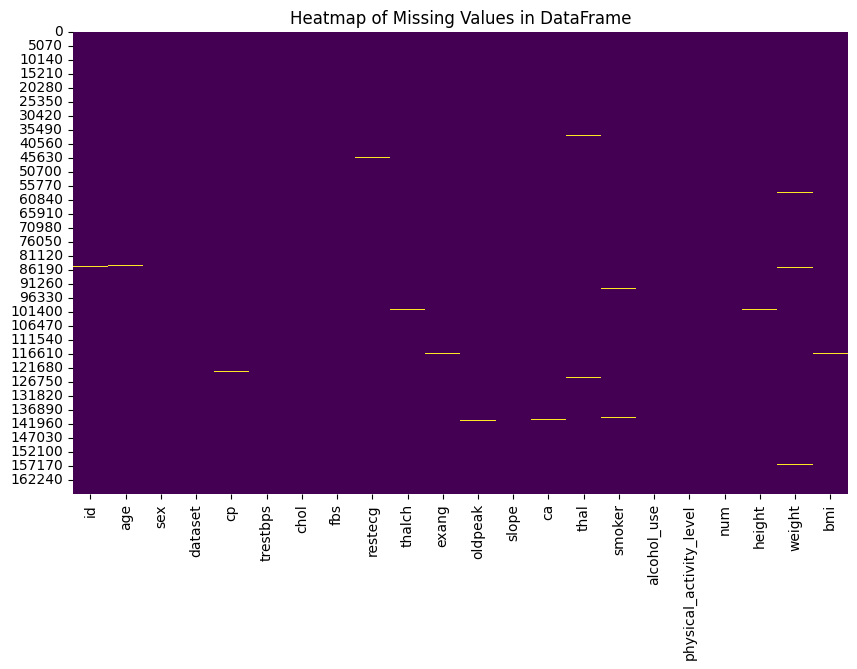

In [6]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Heatmap of Missing Values in DataFrame")


# Drop Columns

In [7]:
# df = df.drop(columns=["dataset","id"])


In [8]:
df = df[df.isnull().sum(axis=1) <= 4 ]

In [9]:
df.shape

(167305, 22)

In [10]:
df["num"].value_counts()

num
0    75373
1    41918
2    25076
3    16752
4     8186
Name: count, dtype: int64

# check outliers in dataset

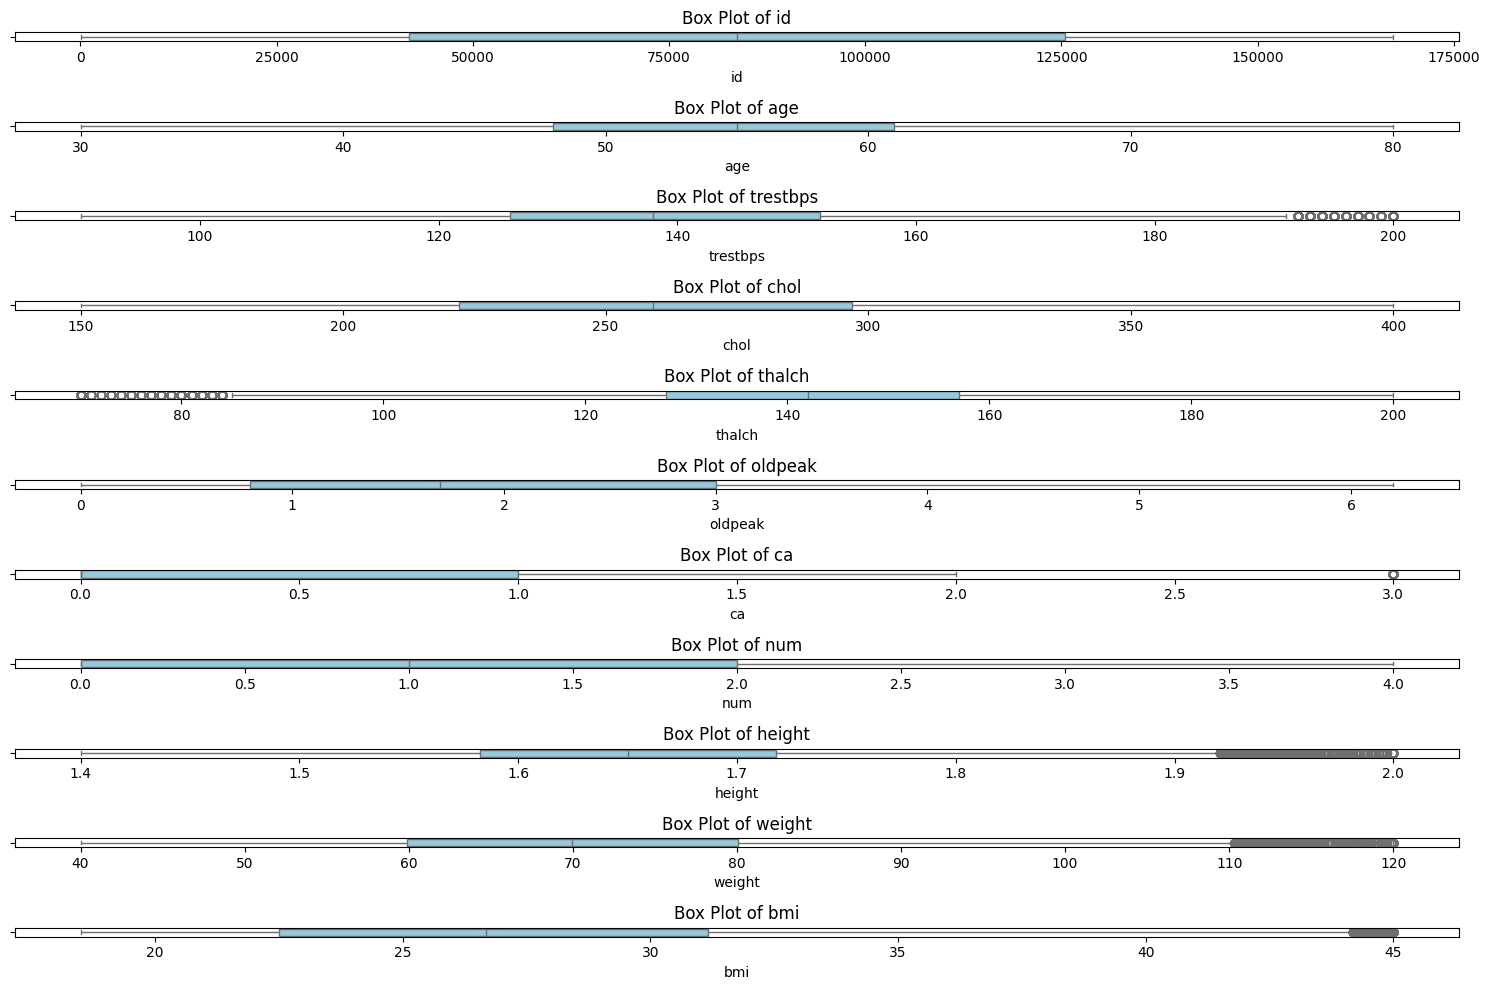

In [11]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Set the plot size
plt.figure(figsize=(15, 10))

# Create a box plot for each numeric column
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 1, i)  # Create a subplot for each column
    sns.boxplot(x=df[column], color='skyblue')  # Plot boxplot
    plt.title(f'Box Plot of {column}')
    plt.tight_layout()  # Adjust layout to prevent overlapping

plt.show()

# Remove Outliers

In [12]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for all numeric columns
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)

# Compute IQR for each numeric column
IQR = Q3 - Q1

# Create a boolean mask where outliers are detected
# Outliers are any values outside the range [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR]
outliers = ((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)

# Remove outliers
df_cleaned = df[~outliers]

# Check the dataset after removing outliers



C:\Users\p c\AppData\Local\Temp\ipykernel_2492\2809249776.py:15: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()  # Adjust layout to prevent overlapping
C:\Users\p c\AppData\Local\Temp\ipykernel_2492\2809249776.py:15: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()  # Adjust layout to prevent overlapping
C:\Users\p c\AppData\Local\Temp\ipykernel_2492\2809249776.py:15: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()  # Adjust layout to prevent overlapping
C:\Users\p c\AppData\Local\Temp\ipykernel_2492\2809249776.py:15: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()  # Adjust layout to prevent over

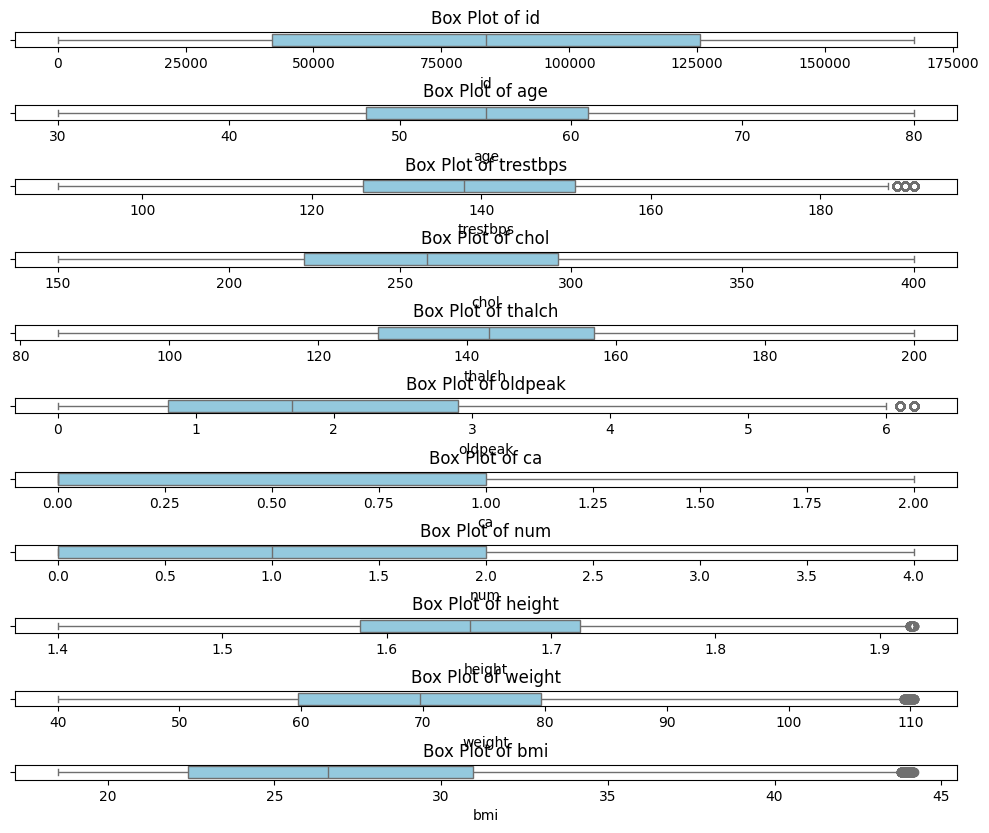

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify numeric columns (int64 and float64 types)
numeric_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Set the plot size
plt.figure(figsize=(10, 8))

# Create a box plot for each numeric column
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 1, i)  # Create a subplot for each column
    sns.boxplot(x=df_cleaned[column], color='skyblue')  # Plot boxplot
    plt.title(f'Box Plot of {column}')
    plt.tight_layout()  # Adjust layout to prevent overlapping

plt.show()


# Count of Duplicate Rows in DataFrame

In [14]:
duplicate = df.duplicated()
print(duplicate.sum())

0


# Feature and Target Variable Extraction

In [15]:
x = df_cleaned.drop(columns=["num"])
y = df_cleaned["num"]

In [16]:
x.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal',
       'smoker', 'alcohol_use', 'physical_activity_level', 'height', 'weight',
       'bmi'],
      dtype='object')

In [17]:
x.shape

(154696, 21)

# Feature Transformation Pipelines

In [18]:
# Define target variable
target = 'num'

# Define categorical features
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'ca', 'smoker', 'alcohol_use', 'physical_activity_level', 'dataset']

# Define numerical features (drop categorical + id + target)
numerical_features = x.drop(['id', 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'ca', 'smoker', 
                             'alcohol_use', 'physical_activity_level', 'dataset'], axis=1).columns

In [19]:
numerical_transform = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy='mean')),
    ("scaler", StandardScaler())
])

categorical_transform = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy='most_frequent')),
    ("onehot", OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transform, categorical_features),
        ("num", numerical_transform, numerical_features)
    ]
)



In [20]:
x = preprocessor.fit_transform(x)

# Missing Data Analysis After Transformation

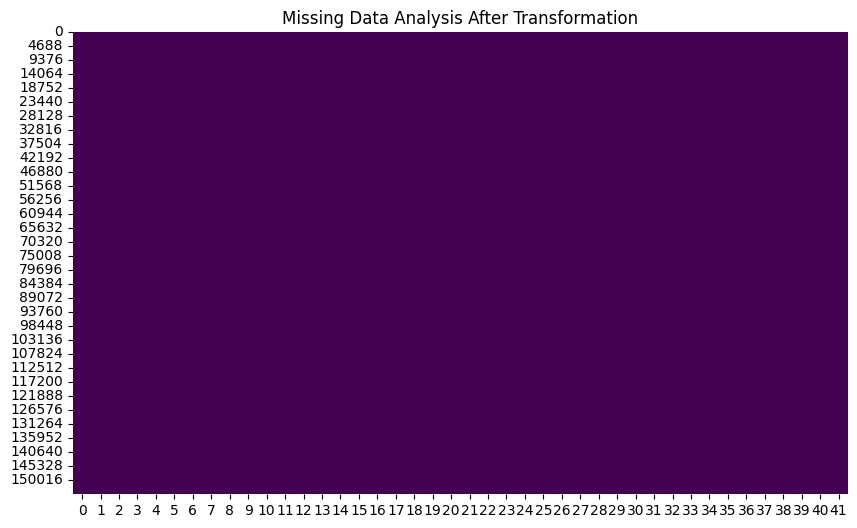

In [21]:
x_df = pd.DataFrame(x)

# Plot heatmap of missing values
plt.figure(figsize=(10, 6))
sns.heatmap(x_df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data Analysis After Transformation")
plt.show()

# Data Split: Training and Testing Sets

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [23]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Naïve Bayes Classification

Naïve Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.88      0.81     14142
           1       0.47      0.40      0.43      7853
           2       0.45      0.40      0.42      4654
           3       0.48      0.46      0.47      2985
           4       0.57      0.37      0.45      1306

    accuracy                           0.62     30940
   macro avg       0.54      0.50      0.52     30940
weighted avg       0.60      0.62      0.61     30940

Accuracy: 0.6222689075630252


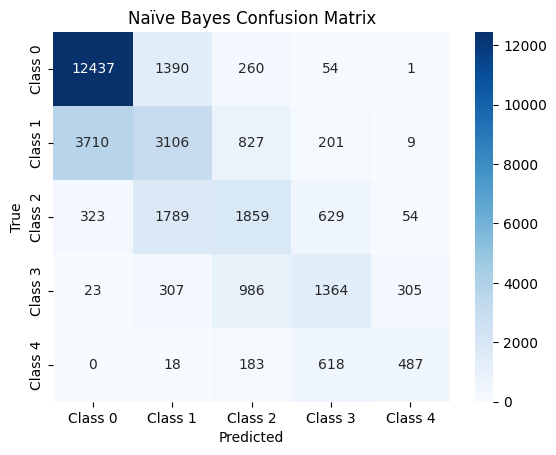

In [24]:
# Initialize the Naïve Bayes classifier


nb_model = GaussianNB()

# Train the model on the training data
nb_model.fit(x_train, y_train)

# Make predictions
y_pred_nb = nb_model.predict(x_test)

# Evaluate the performance
print("Naïve Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))
print("Accuracy:", accuracy_score(y_test, y_pred_nb))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1','Class 2','Class 3','Class 4'], yticklabels=['Class 0', 'Class 1','Class 2','Class 3','Class 4'])
plt.title("Naïve Bayes Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


# K Means Clustering

## Clustering Visualization

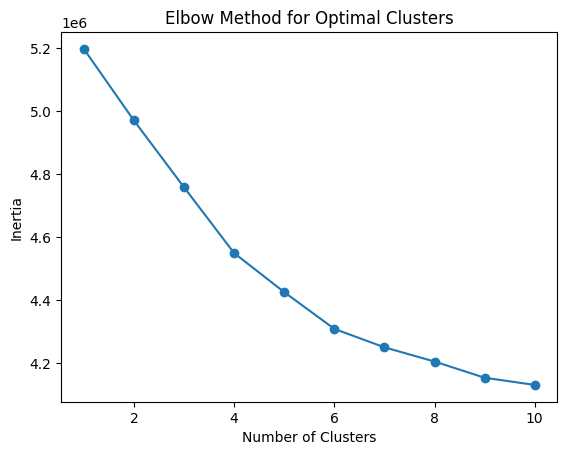

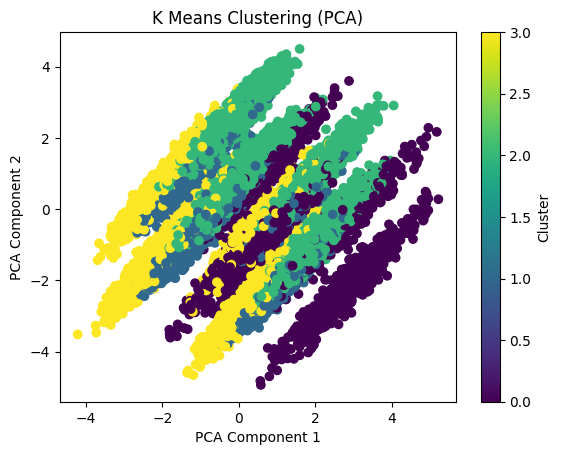

Silhouette Score: 0.074599705059512
Inertia: 4548820.472117503


In [74]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Step 1: Try the Elbow Method to determine optimal number of clusters
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(x_train)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Step 2: Select the optimal number of clusters based on the Elbow plot (example: 3 or 4)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(x_train)

# Step 3: Predict the clusters and visualize in reduced dimensions
y_pred_kmeans = kmeans.predict(x_test)

# PCA for 2D visualization
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_test)

# Plot the clustering visualization
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y_pred_kmeans, cmap='viridis')
plt.title("K Means Clustering (PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster')
plt.show()

# Step 4: Evaluate clustering using Silhouette Score
silhouette_avg = silhouette_score(x_test, y_pred_kmeans)
print("Silhouette Score:", silhouette_avg)

# Optional: Check for Inertia (sum of squared distances to the nearest cluster center)
print("Inertia:", kmeans.inertia_)


# Empowering the Random Forest: 
Model Training

In [27]:
model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)


RandomForestClassifier()

# Accuracy
Accuracy is the ratio of correct predictions (both positives and negatives) to the total number of cases.

In [ ]:
y_pred_rf = model_rf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Model Accuracy: {accuracy:.2f}")

NameError: name 'model_rf' is not defined

# Actual vs Predicted Values graph

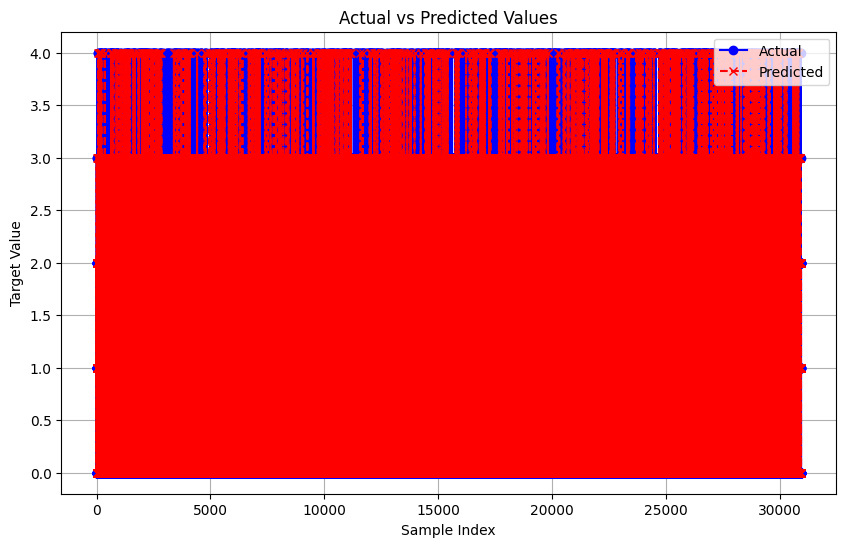

In [29]:
# Actual vs Predicted Values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', color='b', marker='o')  # Actual values
plt.plot(y_pred_rf, label='Predicted', color='r', linestyle='--', marker='x')  # Predicted values
plt.title('Actual vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.legend()
plt.grid(True)
plt.show()

#  Gini Coefficient (using AUC score for binary classification)
The Gini coefficient is derived from the AUC (Area Under the Curve) of the ROC (Receiver Operating Characteristic) curve. The formula is: 

Gini=2×AUC−1

In [30]:
#  Gini Coefficient (using AUC score for binary classification)
from sklearn.metrics import roc_auc_score

# Get predicted probabilities for each class
y_pred_proba = model_rf.predict_proba(x_test)

# Multi-class classification using OvR (One-vs-Rest)
if len(model_rf.classes_) > 2:
    auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
else:
    auc = roc_auc_score(y_test, y_pred_proba[:, 1])  # For binary classification

print(f"AUC Score: {auc}")




AUC Score: 0.8965719119660829


 # Confusion Matrix
A confusion matrix provides a summary of prediction results, showing True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN).

In [31]:
conf_matrix = confusion_matrix(y_test, y_pred_rf)


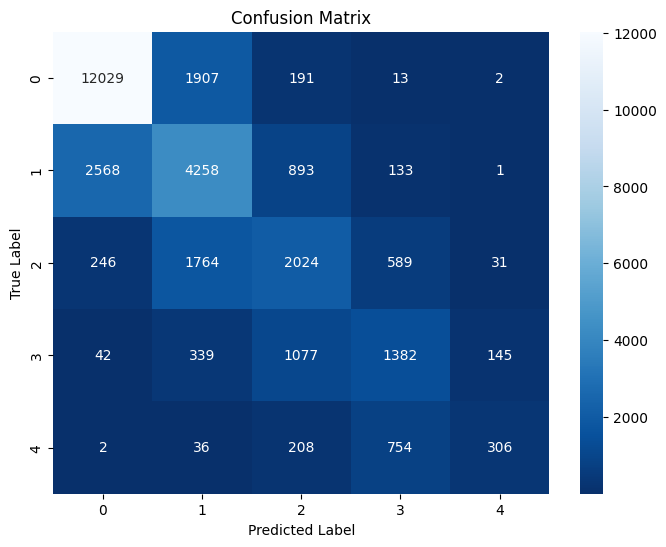

In [32]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues_r')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Precision
Precision measures the proportion of positive identifications that are actually correct (TP / (TP + FP)).

In [33]:
# Precision
precision = precision_score(y_test, y_pred_rf, average='macro')
print(f"Precision: {precision}")

Precision: 0.5787623100651141


# Recall
Recall (or sensitivity) is the proportion of actual positives that were correctly identified (TP / (TP + FN)).

In [34]:
# Recall
recall = recall_score(y_test, y_pred_rf, average='macro')
print(f"Recall: {recall}")

Recall: 0.5049959151779146


# F1 Score
The F1 score is the harmonic mean of precision and recall, offering a balance between the two.

In [35]:
# F1 Score
f1 = f1_score(y_test, y_pred_rf, average="macro")
print(f"F1 Score: {f1}")


F1 Score: 0.523395943011301


# AUC-ROC Curve
The ROC curve plots the True Positive Rate (Recall) vs. the False Positive Rate. The AUC score summarizes the performance.

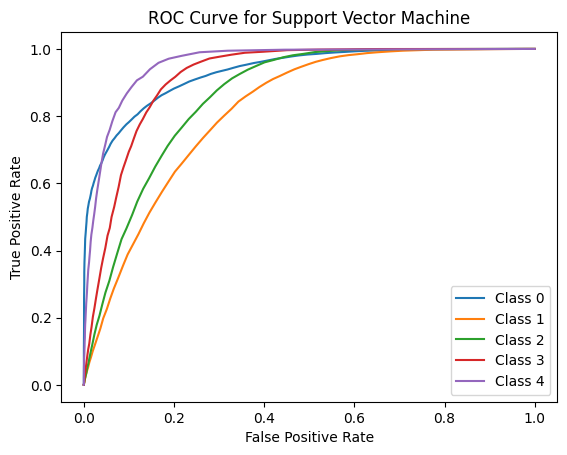

In [36]:
# AUC-ROC Curve
from sklearn.preprocessing import label_binarize
def plot_roc_curve(model, X_test, y_test):
    # Check if the model has predict_proba(), otherwise use decision_function()
    if hasattr(model, 'predict_proba'):
        y_probs = model.predict_proba(X_test)
    else:
        y_probs = model.decision_function(X_test)

    # Handle binary and multi-class classification
    if len(model.classes_) > 2:
        # Multi-class case (One-vs-Rest)
        y_test_bin = label_binarize(y_test, classes=model.classes_)
        for i, class_name in enumerate(model.classes_):
            fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_probs[:, i])
            plt.plot(fpr, tpr, label=f'Class {class_name}')
    else:
        # Binary classification case
        y_probs = y_probs[:, 1] if y_probs.ndim > 1 else y_probs
        fpr, tpr, _ = roc_curve(y_test, y_probs)
        plt.plot(fpr, tpr, label=f'{model.__class__.__name__}')
    models = ["ROC Curve for logistic Regression", "ROC Curve for DecisionTreeClassifier", "ROC Curve for RandomForestClassifier", "ROC Curve for GradientBoostingClassifier", "ROC Curve for Support Vector Machine"]

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    for i in models:
      plt.title(i)
    plt.legend(loc='best')
    plt.show()
# Example of calling the function for different models
plot_roc_curve(model_rf, x_test, y_test)

# Classification report
A classification report provides key metrics (precision, recall, F1-score, and support) to evaluate the performance of a classification model for each class in a dataset.

In [37]:
class_report = classification_report(y_test, y_pred_rf)
print(class_report)

              precision    recall  f1-score   support

           0       0.81      0.85      0.83     14142
           1       0.51      0.54      0.53      7853
           2       0.46      0.43      0.45      4654
           3       0.48      0.46      0.47      2985
           4       0.63      0.23      0.34      1306

    accuracy                           0.65     30940
   macro avg       0.58      0.50      0.52     30940
weighted avg       0.64      0.65      0.64     30940



# Empowering the Decision Tree Classifier: 

In [38]:
model_dt = DecisionTreeClassifier()
model_dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [39]:
y_pred_dt = model_dt.predict(x_test)
accuracy = accuracy_score(y_test,y_pred_dt)
print(accuracy)

0.5680025856496445


# Actual vs Predicted Values


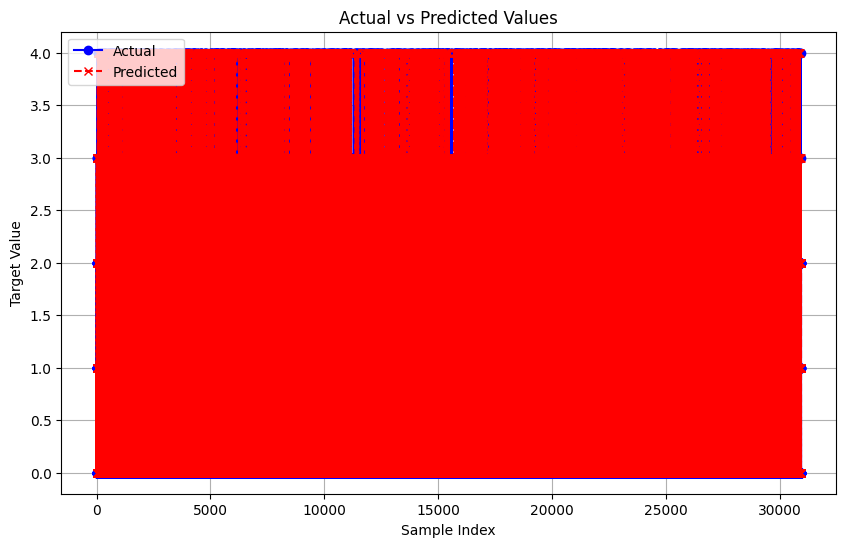

In [40]:
# Actual vs Predicted Values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', color='b', marker='o')  # Actual values
plt.plot(y_pred_dt, label='Predicted', color='r', linestyle='--', marker='x')  # Predicted values
plt.title('Actual vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.legend()
plt.grid(True)
plt.show()

#  Gini Coefficient (using AUC score for binary classification)

In [41]:
#  Gini Coefficient (using AUC score for binary classification)
from sklearn.metrics import roc_auc_score

# Get predicted probabilities for each class
y_pred_proba = model_dt.predict_proba(x_test)

# Multi-class classification using OvR (One-vs-Rest)
if len(model_rf.classes_) > 2:
    auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
else:
    auc = roc_auc_score(y_test, y_pred_proba[:, 1])  # For binary classification

print(f"AUC Score: {auc}")

AUC Score: 0.6712622367964995


 # Confusion Matrix

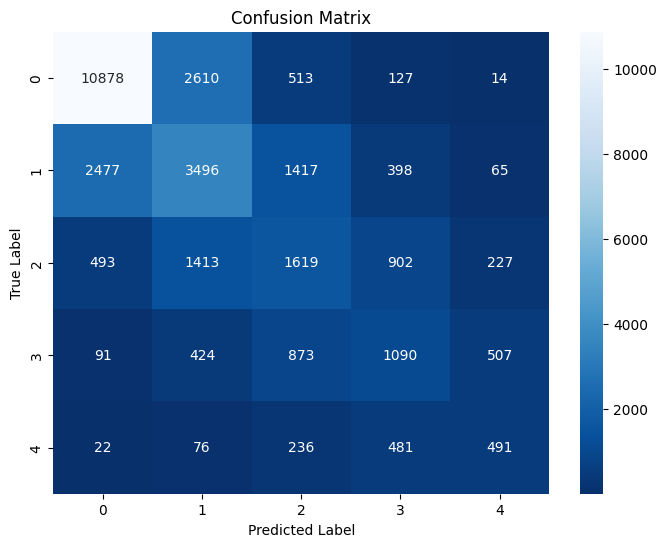

In [42]:
 # Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues_r')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Precision


In [43]:
# Precision
precision = precision_score(y_test, y_pred_dt, average='macro')
print(f"Precision: {precision}")

Precision: 0.4605637312468077


# Recall

In [44]:
# Recall
recall = recall_score(y_test, y_pred_dt, average='macro')
print(f"Recall: {recall}")

Recall: 0.460673473337638


# AUC-ROC Curve


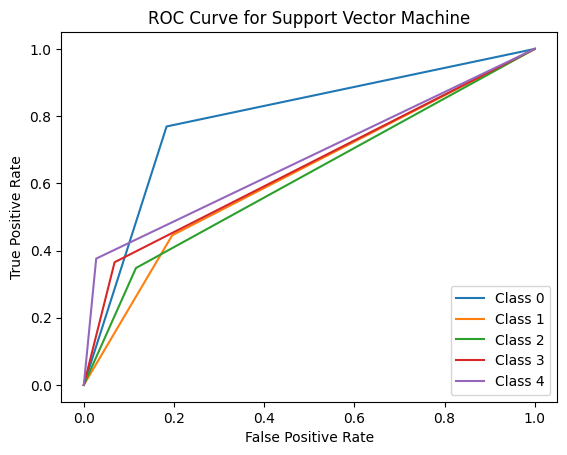

In [45]:
# AUC-ROC Curve
from sklearn.preprocessing import label_binarize
def plot_roc_curve(model, X_test, y_test):
    # Check if the model has predict_proba(), otherwise use decision_function()
    if hasattr(model, 'predict_proba'):
        y_probs = model.predict_proba(X_test)
    else:
        y_probs = model.decision_function(X_test)

    # Handle binary and multi-class classification
    if len(model.classes_) > 2:
        # Multi-class case (One-vs-Rest)
        y_test_bin = label_binarize(y_test, classes=model.classes_)
        for i, class_name in enumerate(model.classes_):
            fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_probs[:, i])
            plt.plot(fpr, tpr, label=f'Class {class_name}')
    else:
        # Binary classification case
        y_probs = y_probs[:, 1] if y_probs.ndim > 1 else y_probs
        fpr, tpr, _ = roc_curve(y_test, y_probs)
        plt.plot(fpr, tpr, label=f'{model.__class__.__name__}')
    models = ["ROC Curve for logistic Regression", "ROC Curve for DecisionTreeClassifier", "ROC Curve for RandomForestClassifier", "ROC Curve for GradientBoostingClassifier", "ROC Curve for Support Vector Machine"]

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    for i in models:
      plt.title(i)
    plt.legend(loc='best')
    plt.show()
# Example of calling the function for different models
plot_roc_curve(model_dt, x_test, y_test)

# Empowering the radient Boosting Classifier: 

In [46]:
model_gb = GradientBoostingClassifier()
model_gb.fit(x_train, y_train)

GradientBoostingClassifier()

In [47]:

y_pred_gb = model_gb.predict(x_test)
accuracy = accuracy_score(y_test,y_pred_gb)
print(accuracy)

0.6667097608274078


# Actual vs Predicted Values

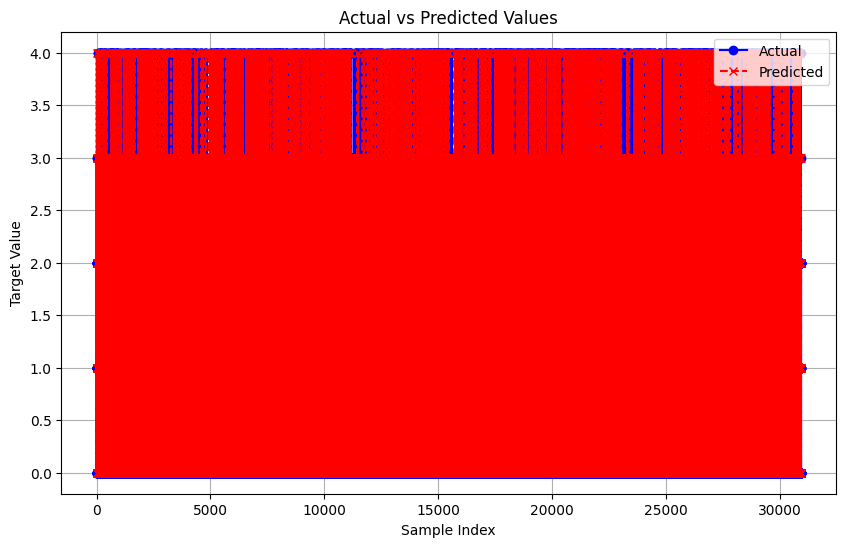

In [48]:
# Actual vs Predicted Values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', color='b', marker='o')  # Actual values
plt.plot(y_pred_gb, label='Predicted', color='r', linestyle='--', marker='x')  # Predicted values
plt.title('Actual vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.legend()
plt.grid(True)
plt.show()

#  Gini Coefficient (using AUC score for binary classification)

In [49]:
#  Gini Coefficient (using AUC score for binary classification)
from sklearn.metrics import roc_auc_score

# Get predicted probabilities for each class
y_pred_proba = model_gb.predict_proba(x_test)

# Multi-class classification using OvR (One-vs-Rest)
if len(model_rf.classes_) > 2:
    auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
else:
    auc = roc_auc_score(y_test, y_pred_proba[:, 1])  # For binary classification

print(f"AUC Score: {auc}")

AUC Score: 0.9061919099254373


 # Confusion Matrix

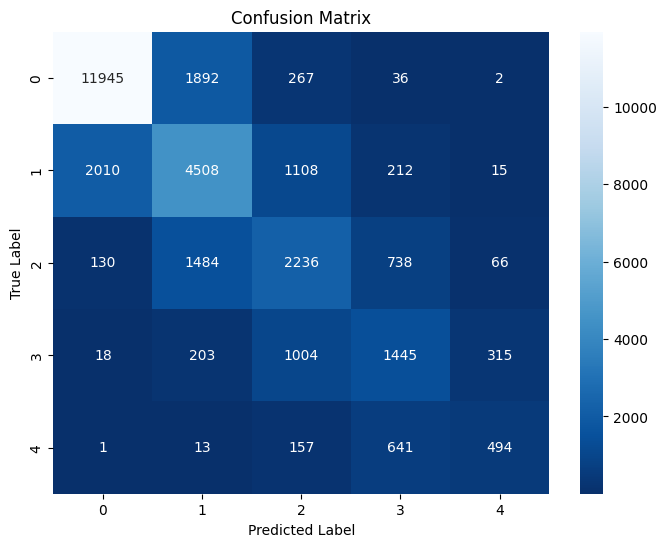

In [50]:
 # Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues_r')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Precision


In [51]:
# Precision
precision = precision_score(y_test, y_pred_gb, average='macro')
print(f"Precision: {precision}")

Precision: 0.5792443941450814


# Recall

In [52]:
# Recall
recall = recall_score(y_test, y_pred_gb, average='macro')
print(f"Recall: {recall}")

Recall: 0.552296705137483


# F1 Score

In [53]:
# F1 Score
f1 = f1_score(y_test, y_pred_gb, average="macro")
print(f"F1 Score: {f1}")

F1 Score: 0.5624018984803565


# AUC-ROC Curve

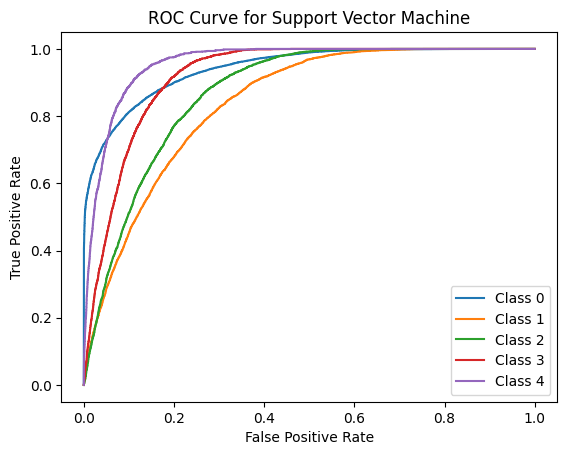

In [54]:
# AUC-ROC Curve
from sklearn.preprocessing import label_binarize
def plot_roc_curve(model, X_test, y_test):
    # Check if the model has predict_proba(), otherwise use decision_function()
    if hasattr(model, 'predict_proba'):
        y_probs = model.predict_proba(X_test)
    else:
        y_probs = model.decision_function(X_test)

    # Handle binary and multi-class classification
    if len(model.classes_) > 2:
        # Multi-class case (One-vs-Rest)
        y_test_bin = label_binarize(y_test, classes=model.classes_)
        for i, class_name in enumerate(model.classes_):
            fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_probs[:, i])
            plt.plot(fpr, tpr, label=f'Class {class_name}')
    else:
        # Binary classification case
        y_probs = y_probs[:, 1] if y_probs.ndim > 1 else y_probs
        fpr, tpr, _ = roc_curve(y_test, y_probs)
        plt.plot(fpr, tpr, label=f'{model.__class__.__name__}')
    models = ["ROC Curve for logistic Regression", "ROC Curve for DecisionTreeClassifier", "ROC Curve for RandomForestClassifier", "ROC Curve for GradientBoostingClassifier", "ROC Curve for Support Vector Machine"]

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    for i in models:
      plt.title(i)
    plt.legend(loc='best')
    plt.show()
# Example of calling the function for different models
plot_roc_curve(model_gb, x_test, y_test)

# Empowering the support vector machine: 

In [55]:
model_svm = SVC(probability=True)
model_svm.fit(x_train, y_train)

SVC(probability=True)

In [56]:

y_pred_svm = model_svm.predict(x_test)
accuracy = accuracy_score(y_test,y_pred_svm)
print(accuracy)

0.7706851971557854


# Actual vs Predicted Values


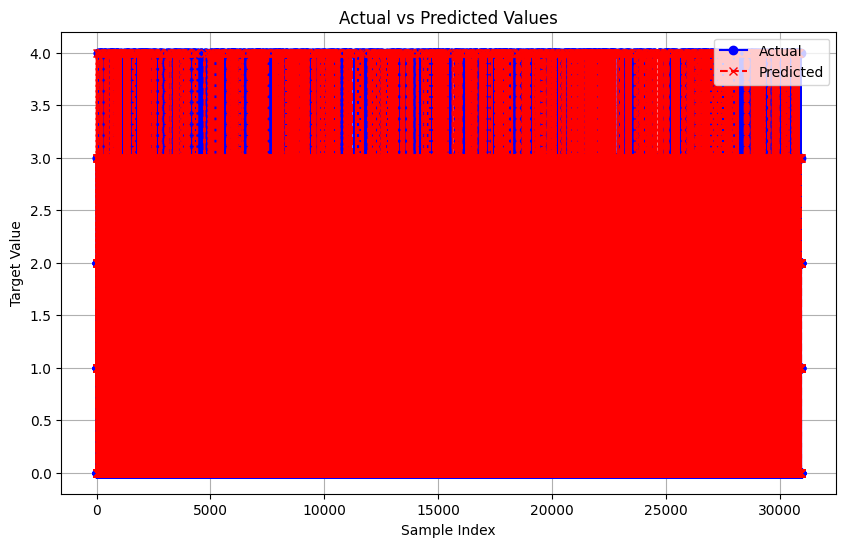

In [57]:
# Actual vs Predicted Values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', color='b', marker='o')  # Actual values
plt.plot(y_pred_svm, label='Predicted', color='r', linestyle='--', marker='x')  # Predicted values
plt.title('Actual vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.legend()
plt.grid(True)
plt.show()

#  Gini Coefficient (using AUC score for binary classification)

In [58]:
#  Gini Coefficient (using AUC score for binary classification)
from sklearn.metrics import roc_auc_score

# Get predicted probabilities for each class
y_pred_proba = model_svm.predict_proba(x_test)

# Multi-class classification using OvR (One-vs-Rest)
if len(model_rf.classes_) > 2:
    auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
else:
    auc = roc_auc_score(y_test, y_pred_proba[:, 1])  # For binary classification

print(f"AUC Score: {auc}")

AUC Score: 0.9458711173571922


 # Confusion Matrix

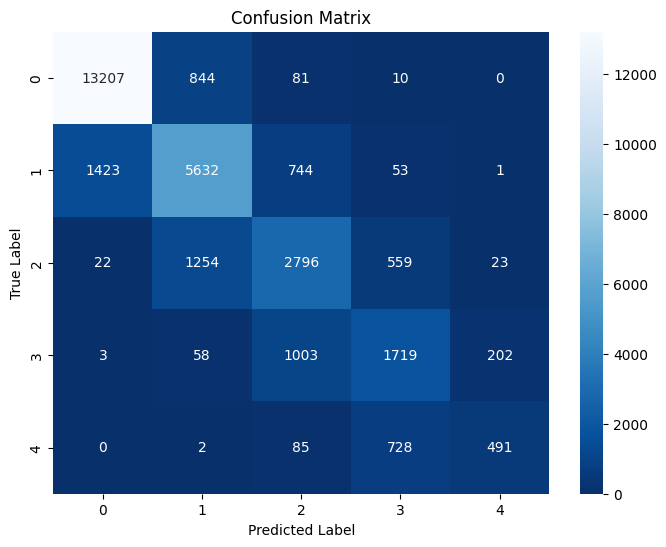

In [59]:
 # Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues_r')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Precision


In [60]:
# Precision
precision = precision_score(y_test, y_pred_svm, average='macro')
print(f"Precision: {precision}")

Precision: 0.6925688031213841


# Recall

In [61]:
# Recall
recall = recall_score(y_test, y_pred_svm, average='macro')
print(f"Recall: {recall}")

Recall: 0.6407346153006339


# F1 Score

In [62]:
# F1 Score
f1 = f1_score(y_test, y_pred_svm, average="macro")
print(f"F1 Score: {f1}")

F1 Score: 0.6575731952627959


# AUC-ROC Curve

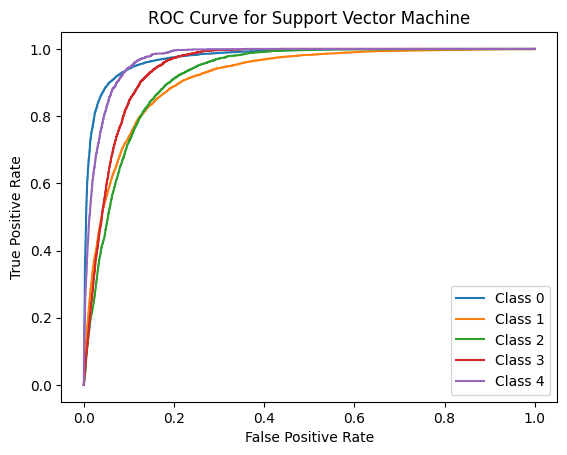

In [63]:
# AUC-ROC Curve
from sklearn.preprocessing import label_binarize
def plot_roc_curve(model, X_test, y_test):
    # Check if the model has predict_proba(), otherwise use decision_function()
    if hasattr(model, 'predict_proba'):
        y_probs = model.predict_proba(X_test)
    else:
        y_probs = model.decision_function(X_test)

    # Handle binary and multi-class classification
    if len(model.classes_) > 2:
        # Multi-class case (One-vs-Rest)
        y_test_bin = label_binarize(y_test, classes=model.classes_)
        for i, class_name in enumerate(model.classes_):
            fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_probs[:, i])
            plt.plot(fpr, tpr, label=f'Class {class_name}')
    else:
        # Binary classification case
        y_probs = y_probs[:, 1] if y_probs.ndim > 1 else y_probs
        fpr, tpr, _ = roc_curve(y_test, y_probs)
        plt.plot(fpr, tpr, label=f'{model.__class__.__name__}')
    models = ["ROC Curve for logistic Regression", "ROC Curve for DecisionTreeClassifier", "ROC Curve for RandomForestClassifier", "ROC Curve for GradientBoostingClassifier", "ROC Curve for Support Vector Machine"]

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    for i in models:
      plt.title(i)
    plt.legend(loc='best')
    plt.show()
# Example of calling the function for different models
plot_roc_curve(model_svm, x_test, y_test)

# Empowering the Logistic Regression: 

In [64]:
model_lr = LogisticRegression()
model_lr.fit(x_train, y_train)
y_pred_lr = model_lr.predict(x_test)
accuracy = accuracy_score(y_test,y_pred_lr)
print(accuracy)

0.6683257918552036


# Actual vs Predicted Values


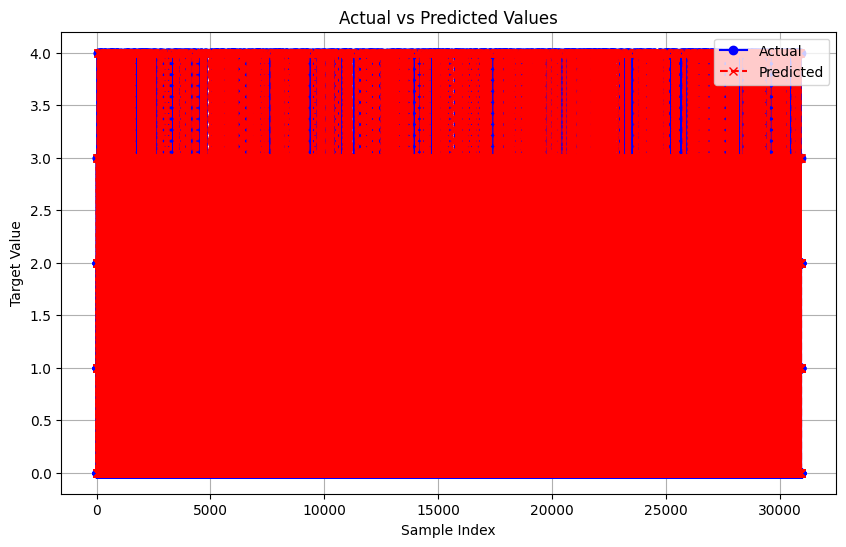

In [65]:
# Actual vs Predicted Values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', color='b', marker='o')  # Actual values
plt.plot(y_pred_lr, label='Predicted', color='r', linestyle='--', marker='x')  # Predicted values
plt.title('Actual vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.legend()
plt.grid(True)
plt.show()

#  Gini Coefficient (using AUC score for binary classification)

In [66]:
#  Gini Coefficient (using AUC score for binary classification)
from sklearn.metrics import roc_auc_score

# Get predicted probabilities for each class
y_pred_proba_lr = model_lr.predict_proba(x_test)

# Multi-class classification using OvR (One-vs-Rest)
if len(model_rf.classes_) > 2:
    auc = roc_auc_score(y_test, y_pred_proba_lr, multi_class='ovr')
else:
    auc = roc_auc_score(y_test, y_pred_proba_lr[:, 1])  # For binary classification

print(f"AUC Score: {auc}")

AUC Score: 0.9073319354690759


 # Confusion Matrix

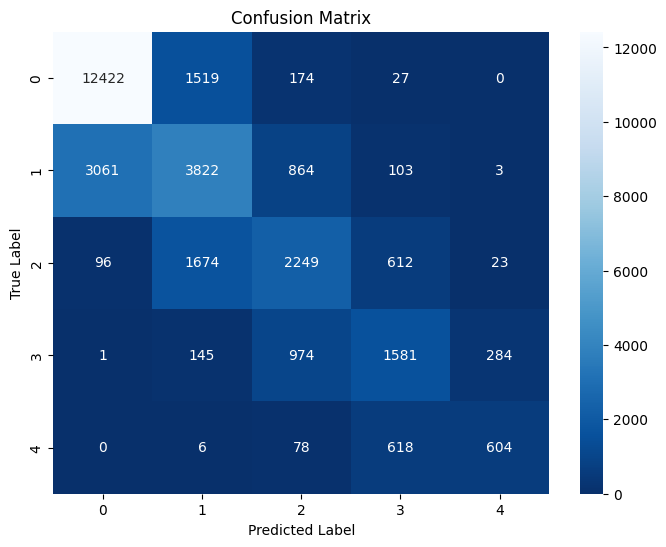

In [67]:
 # Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues_r')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Precision


In [68]:
# Precision
precision = precision_score(y_test, y_pred_lr, average='macro')
print(f"Precision: {precision}")

Precision: 0.6094764268303191


# Recall

In [69]:
# Recall
recall = recall_score(y_test, y_pred_lr, average='macro')
print(f"Recall: {recall}")

Recall: 0.5680877546167828


# F1 Score

In [70]:
# F1 Score
f1 = f1_score(y_test, y_pred_lr, average="macro")
print(f"F1 Score: {f1}")

F1 Score: 0.5845452481596295


# AUC-ROC Curve

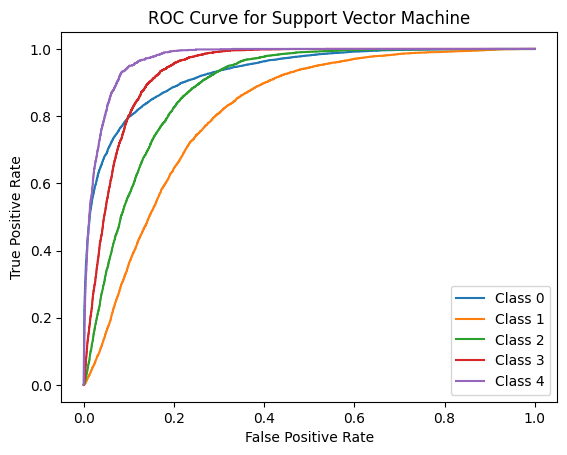

In [71]:
# AUC-ROC Curve
from sklearn.preprocessing import label_binarize
def plot_roc_curve(model, X_test, y_test):
    # Check if the model has predict_proba(), otherwise use decision_function()
    if hasattr(model, 'predict_proba'):
        y_probs = model.predict_proba(X_test)
    else:
        y_probs = model.decision_function(X_test)

    # Handle binary and multi-class classification
    if len(model.classes_) > 2:
        # Multi-class case (One-vs-Rest)
        y_test_bin = label_binarize(y_test, classes=model.classes_)
        for i, class_name in enumerate(model.classes_):
            fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_probs[:, i])
            plt.plot(fpr, tpr, label=f'Class {class_name}')
    else:
        # Binary classification case
        y_probs = y_probs[:, 1] if y_probs.ndim > 1 else y_probs
        fpr, tpr, _ = roc_curve(y_test, y_probs)
        plt.plot(fpr, tpr, label=f'{model.__class__.__name__}')
    models = ["ROC Curve for logistic Regression", "ROC Curve for DecisionTreeClassifier", "ROC Curve for RandomForestClassifier", "ROC Curve for GradientBoostingClassifier", "ROC Curve for Support Vector Machine"]

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    for i in models:
      plt.title(i)
    plt.legend(loc='best')
    plt.show()
# Example of calling the function for different models
plot_roc_curve(model_lr, x_test, y_test)

In [72]:
# import joblib
# joblib.dump(preprocessor, "scalar.pkl")

In [73]:

# joblib.dump(model_rf, "heartDisease-umehabiba_Fakhira-batch1.pkl")